<a href="https://colab.research.google.com/github/iamyoungjin/Alphago_al/blob/master/EPL_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019 멋사 Alpha_Goal

In [ ]:
#data preprocessing
import pandas as pd
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from IPython.display import display
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
import seaborn as sns
%matplotlib inline

In [ ]:
# pandas 옵션 설정 (모든 컬럼,데이터 display)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
df = pd.read_csv('~/downloads/combine_dataset_00_18.csv' , encoding='ISO-8859-1')

In [ ]:
df.head()

,id,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,2018,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0,1.57,3.9,7.50,1.53,4.0,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00,1.57,4.0,7.00,39.0,1.60,1.56,4.20,3.92,8.05,7.06,38.0,2.12,2.03,1.85,1.79,17.0,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0,1.90,3.6,4.50,1.90,3.4,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00,1.87,3.6,4.75,39.0,1.93,1.88,3.71,3.53,4.75,4.37,38.0,2.05,1.98,1.92,1.83,20.0,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0,2.50,3.4,3.00,2.45,3.3,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80,2.50,3.4,3.00,39.0,2.60,2.47,3.49,3.35,3.05,2.92,38.0,2.00,1.95,1.96,1.87,22.0,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0,6.50,4.0,1.61,6.25,3.9,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57,6.50,4.0,1.62,38.0,6.85,6.09,4.07,3.90,1.66,1.61,37.0,2.05,1.98,1.90,1.84,23.0,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0,3.90,3.5,2.04,3.80,3.5,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05,3.90,3.4,2.10,39.0,4.01,3.83,3.57,3.40,2.12,2.05,38.0,2.10,2.01,1.88,1.81,20.0,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
res_16 = df.ix[:,:23]   #23번째 컬럼까지만 나오게 res_16에 저장

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [ ]:
res_16.head()

,id,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,2018,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,2018,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,2018,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,2018,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,2018,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0


In [ ]:
res_16 = res_16.drop(['id','Date'],axis=1) #res에서 id와 div 컬럼을 제거
table_features = df.ix[:,:7] #tabe_feature 은 HomeTeam부터 FTR까지로 설정

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [ ]:
table_features = table_features.drop(['FTHG','FTAG','id','Date'],axis=1) #위의 table_feature에서 다음 네가지 컬럼 제거
#남은 컬럼 HomeTeam , AwayTeam, FTR  = table_features
bet_16 = df.ix[:,23:]  # bet_16은 컬럼 id부터 AR까지 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
table_features.head()

,HomeTeam,AwayTeam,FTR
0,Man United,Leicester,H
1,Bournemouth,Cardiff,H
2,Fulham,Crystal Palace,A
3,Huddersfield,Chelsea,A
4,Newcastle,Tottenham,A


In [ ]:
res_16.head() #[28]에서 id/date 컬럼을 제거한 결과로 출력 

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Man United,Leicester,2,1,H,1,0,H,A Marriner,8,13,6,4,11,8,2,5,2,1,0,0
1,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,12,10,4,1,11,9,7,4,1,1,0,0
2,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,15,10,6,9,9,11,5,5,1,2,0,0
3,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,6,13,1,4,9,8,2,5,2,1,0,0
4,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,15,15,2,5,11,12,3,5,2,2,0,0


In [ ]:
feature_table = df.ix[:,:23] #feature_table이라는 새로운 변수에 AR까지 자른 데이터 저장

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [ ]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',)) #table_16에 해당 컬럼으로 테이블 생성
table_16 = table_16[:-10]

In [ ]:
res_16 = res_16[:-10] 
res_16.shape[0]

7209

In [ ]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0] #res_16 7209데이터에서 full time hometeam goal의 평균
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0] #res_16 7209데이터에서 full time Awayteam goal의 평균
avg_home_conceded_16 = avg_away_scored_16  #위에서 구한 홈/어웨이팀의 평균 득점 저장
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)   #홈팀이 넣은골 == 어웨이팀이 먹힌골이기 때문에 수치 동일
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.5294770425856568
Average number of goals away 1.1362186156193648
Average number of goals conceded at home 1.1362186156193648
Average number of goals conceded away 1.5294770425856568


In [ ]:
res_home = res_16.groupby('HomeTeam') #hometeam 으로 그룹화
res_away = res_16.groupby('AwayTeam') #awayteam 으로 그룹화

In [ ]:
pd.DataFrame(res_home) #위 코드의 결과 홈 어웨이 모두 팀별로 데이터들이 저장

,0,1
0,Arsenal,HomeTeam AwayTeam FTHG FTAG FT...
1,Aston Villa,HomeTeam AwayTeam FTHG FTA...
2,Birmingham,HomeTeam AwayTeam FTHG FTAG F...
3,Blackburn,HomeTeam AwayTeam FTHG FTAG ...
4,Blackpool,HomeTeam AwayTeam FTHG FTAG FTR ...
5,Bolton,HomeTeam AwayTeam FTHG FTAG FT...
6,Bournemouth,HomeTeam AwayTeam FTHG FTAG ...
7,Bradford,HomeTeam AwayTeam FTHG FTAG FTR ...
8,Brighton,HomeTeam AwayTeam FTHG FTAG FTR ...
9,Burnley,HomeTeam AwayTeam FTHG FTAG FTR ...


In [ ]:
table_16.Team = res_home.HomeTeam.all().index #table_16의 Team컬럼에는 res_home의 HomTeam의 모든 인덱스 넣기

In [ ]:
table_16.HGS = res_home.FTHG.sum().values   #home goal strength
table_16.HGC = res_home.FTAG.sum().values   #home goal conceded
table_16.AGS = res_away.FTAG.sum().values   #away goal strength
table_16.AGC = res_away.FTHG.sum().values   #away goal conceded

In [ ]:
num_games = res_16.shape[0]/20 #20개의 연도 데이터를 합쳤으니, 총 게임횟수에서 20으로 나눔

In [ ]:
#경기당 평균 데이터 수치를 얻어내기 위한 식
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16 #home attack strength
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16 #away attack strength
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16#home defense strength
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16#away defense strength
table_16.head()

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,797,590,1.445674,1.440606,305,433,0.744720,0.785416
1,Aston Villa,377,341,0.683838,0.832621,341,498,0.832621,0.903319
2,Birmingham,162,111,0.293851,0.271029,140,220,0.341839,0.399057
3,Blackburn,289,229,0.524215,0.559150,239,353,0.583567,0.640305
4,Blackpool,30,25,0.054417,0.061043,37,41,0.090343,0.074370


In [ ]:
table_16.HGS = (table_16.HGS / 50) #50
table_16.AGS = (table_16.AGS / 50)

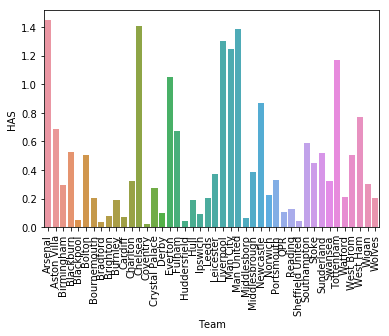

In [ ]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [ ]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [ ]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [ ]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [ ]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail()

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
7204,Ipswich,Man City,H,11,7,0.092509,0.095226,1.237944,0.787230,1
7205,Liverpool,Chelsea,D,14,8,1.298748,0.669027,1.364913,0.636677,0
7206,Leeds,Bradford,H,13,9,0.206784,0.239287,0.024417,0.074370,1
7207,Southampton,Man United,H,9,3,0.587702,0.644610,1.467464,0.691094,1
7208,Newcastle,Arsenal,D,8,2,0.865228,0.932731,1.440606,0.785416,0


In [ ]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [ ]:
X_train.head()

,HST,AST,HAS,HDS,AAS,ADS
0,6,4,1.385815,0.637285,0.439507,0.448032
1,4,1,0.206784,0.288121,0.061043,0.126973
2,6,9,0.672955,0.817971,0.378464,0.391801
3,1,4,0.047161,0.136735,1.364913,0.636677
4,2,5,0.865228,0.932731,1.157368,0.925086


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

In [ ]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
clf3 = XGBClassifier()
clf4 = LinearSVC()

In [ ]:
y_pred = clf4.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators

[0.52770083 0.48199446 0.48959778 0.50346741 0.48682386 0.48266297
 0.48127601 0.46463245 0.45       0.36439499]
0.47325507554718904


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.50554017 0.47506925 0.50346741 0.53398058 0.47850208 0.48682386
 0.48404993 0.48959778 0.45416667 0.41307371]
0.4824271435055986


In [ ]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.59279778 0.59141274 0.57836338 0.54785021 0.53814147 0.52011096
 0.54368932 0.53952843 0.51666667 0.3240612 ]
0.52926221616263


In [ ]:
y_pred = clf3.fit(X_train, y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf3, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

In [ ]:
X_train.head()

In [ ]:
import pickle 

In [ ]:
import pickle 
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

clf3 = XGBClassifier()

In [ ]:
filename = 'finalized_model.sav'

In [ ]:
pickle.dump(clf3,open(filename, 'wb'))

In [ ]:
clf3 = pickle.load(open(filename, 'rb'))